In [1]:
" Import the libraries " 

import os
import sys 
import math
import copy

import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
" Import the scripts of SD for Explaining "

absFilePath = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
newPath = os.path.join(absFilePath, 'SplitSD4X\\')
sys.path.append(newPath)

newPath_supp = os.path.join(newPath, 'supplementary')
sys.path.append(newPath_supp)

from performances import *

In [3]:
" Import matplotlib and sns to display graphs and figures "

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import transforms
from matplotlib.lines import Line2D
import seaborn as sns
%matplotlib inline

In [4]:
" Import the plot functions"
sys.path.append(os.path.dirname(os.getcwd()))
from plotFunctions.PlotMSENeighborGen import *

In [5]:
" Define the functions to save and load data "
import pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [6]:
" LOAD THE DATA "

path = './saved_data/'

data_train   = load_obj(path + 'data_train')
target_train = load_obj(path + 'target_train')
data_test    = load_obj(path  + 'data_test')
target_test  = load_obj(path + 'target_test')

all_lists_neigh = []
all_lists_neigh.append(load_obj(path   + 'list_neighbors_1'))
all_lists_neigh.append(load_obj(path   + 'list_neighbors_2'))
all_lists_neigh.append(load_obj(path   + 'list_neighbors_3'))
all_lists_neigh.append(load_obj(path   + 'list_neighbors_4'))

all_lists_subgroups = []
all_lists_subgroups.append(load_obj(path + 'list_subgroups_1'))
all_lists_subgroups.append(load_obj(path + 'list_subgroups_2'))
all_lists_subgroups.append(load_obj(path + 'list_subgroups_3'))
all_lists_subgroups.append(load_obj(path + 'list_subgroups_4'))

" Number of instances to explain "
n = np.size(data_test,0) 

" Number of neighbors "
nb_neighs = np.size(all_lists_neigh[0][0],0)

## Multi Layer Perceptron Model

In [7]:
" using Sklearn MLP regressor as black box: "

" Sklearn MLP Classifier "

mlp = MLPClassifier(activation='logistic',hidden_layer_sizes=(50,50), max_iter=5000,
                    solver='sgd', random_state=1,alpha=0.1,
                    learning_rate_init=.1)
model_nt = mlp.fit(data_train, target_train)
target_pred_mlp = model_nt.predict(data_test)

## Test the effectiveness of the neighbors generation approaches  

####  MSE Error

In [8]:
path = './data_to_plot/'
f_mse = open(path + "mse_generation.txt","w")
f_mse.close()

In [9]:
nb_models_max = 100
path = './data_to_plot/'
f_mse = open(path + "mse_generation.txt","a")

for j in range (0,4) :
    f_mse.write("Generation_"+str(j+1)+"\n")
    list_subgroups = all_lists_subgroups[j]
    list_neigh = all_lists_neigh[j]
    for i in range (0,nb_models_max-1) :
        S = list_subgroups[i]
        sse_S = loss_sd (S,data_test,list_neigh,model_nt)
        mse_S = sse_S / (n * nb_neighs)
        f_mse.write('{:.2e}'.format(mse_S)+'\n')
f_mse.close()

####  *MSE Error Graph*

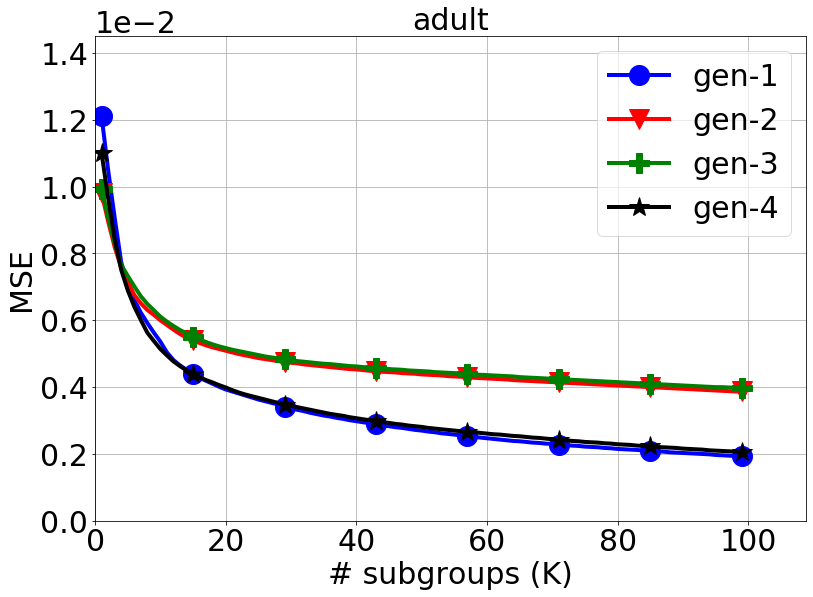

In [10]:
plotMSEwrtNbModels('adult',path)